# Profiling Scanpy  for 68k PBMC cells of [Zheng *et al.*, Nat. Comm. (2017)](https://doi.org/10.1038/ncomms14049)

This is the *Scanpy* benchmark for the *Cell Ranger* R analysis of [Zheng *et al.*, Nat. Comms. (2017)](https://doi.org/10.1038/ncomms14049) available from [here](https://github.com/10XGenomics/single-cell-3prime-paper). Compare the Scanpy version with the [Cell Ranger version of this notebook](zheng17_R.ipynb).

The data is freely available [[page](https://support.10xgenomics.com/single-cell/datasets/fresh_68k_pbmc_donor_a)/[file](https://s3-us-west-2.amazonaws.com/10x.files/samples/cell/fresh_68k_pbmc_donor_a/fresh_68k_pbmc_donor_a_filtered_gene_bc_matrices.tar.gz)] from the 10x homepage and from [GitHub](https://github.com/10XGenomics/single-cell-3prime-paper).

A more pedagogic tutorial can be found [here](https://github.com/theislab/scanpy_usage/tree/master/170505_seurat).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
results_file = './write/zheng17.h5ad'

scanpy==1.4.4+20.g1db414c anndata==0.6.22.post1 umap==0.3.8 numpy==1.16.4 scipy==1.3.1 pandas==0.24.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


Load the data. This takes a long time only when first reading the raw data from the `.mtx` text file. It's very fast through reading from the `./cache/` directory after that (change this using `sc.settings.cachedir`).

In [4]:
%%time
path = './data/filtered_matrices_mex/hg19/'
adata = sc.read(path + 'matrix.mtx', cache=True).T  # transpose the data
adata.var_names = pd.read_csv(path + 'genes.tsv', header=None, sep='\t')[1]
adata.obs_names = pd.read_csv(path + 'barcodes.tsv', header=None)[0]

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


CPU times: user 1.97 s, sys: 798 ms, total: 2.77 s
Wall time: 4.01 s


In [5]:
adata.var_names_make_unique()

Let us use the cell type labels generated by Zheng *et al.* by correlating gene expression with purified bulk data. You can download the bulk labels here [./data/zheng17_bulk_lables.txt](https://github.com/theislab/scanpy_usage/blob/17c34b61f76de79bfdea7512f1782bf3f5ecb160/170503_zheng17/data/PBMC68k.cellLables.txt).

In [6]:
adata.obs['bulk_labels'] = pd.read_csv('./data/filtered_matrices_mex/hg19/PBMC68k.cellLables.txt', header=None)[0].values

In [7]:
sc.pp.filter_genes(adata, min_counts=1)  # only consider genes with more than 1 count

### Constructing and visualizing the single-cell graph

This will construct the single-cell graph - usually a knn graph - that describes cells in their relation to their neighbors.

In [8]:
sc.pp.neighbors(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [9]:
sc.tl.umap(adata)

... storing 'bulk_labels' as categorical


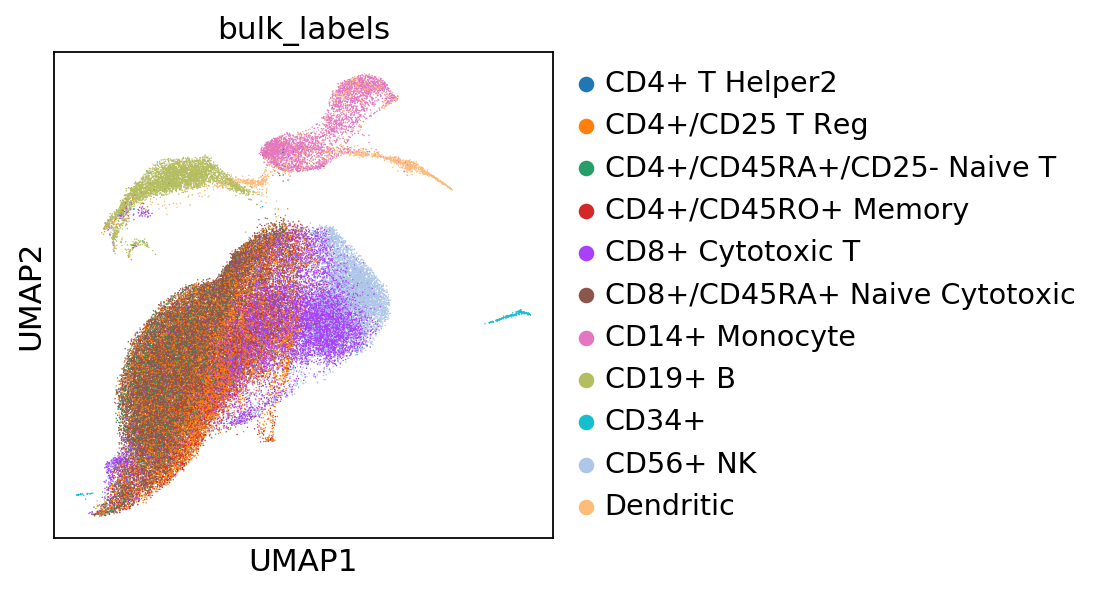

In [10]:
sc.pl.umap(adata, color='bulk_labels')

In [11]:
adata.write("pbmc_68k.h5ad")